In [1]:
library(ROCR)
library(dplyr)

Warning message:
"package 'ROCR' was built under R version 3.6.3"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.6.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
survey <- read.csv('전처리/2번설문/change_harmony.csv')

In [3]:
str(survey)
head(survey)

'data.frame':	96 obs. of  13 variables:
 $ X          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex        : Factor w/ 2 levels "Female","Male": 1 2 1 2 1 1 1 1 1 1 ...
 $ age_class  : int  20 20 20 20 20 30 30 20 30 20 ...
 $ definition : Factor w/ 2 levels "bright","harmony": 1 2 1 1 1 2 2 1 2 2 ...
 $ need       : Factor w/ 2 levels "bright","harmony": 1 2 1 2 1 2 1 1 1 2 ...
 $ purpose    : Factor w/ 3 levels "clothes","cosmetic",..: 1 1 1 1 2 1 1 2 3 1 ...
 $ interest   : int  3 5 5 3 3 4 3 3 5 1 ...
 $ comp       : int  3 5 5 5 2 3 3 2 2 5 ...
 $ triangle1  : int  4 5 5 5 4 2 5 5 5 4 ...
 $ triangle2  : int  3 4 4 2 3 2 3 3 1 2 ...
 $ doubleness1: int  2 1 2 5 4 5 2 1 5 1 ...
 $ doubleness2: int  2 2 2 4 3 4 3 5 2 4 ...
 $ doubleness3: int  1 3 1 5 1 5 5 3 1 2 ...


X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3
0,Female,20,bright,bright,clothes,3,3,4,3,2,2,1
1,Male,20,harmony,harmony,clothes,5,5,5,4,1,2,3
2,Female,20,bright,bright,clothes,5,5,5,4,2,2,1
3,Male,20,bright,harmony,clothes,3,5,5,2,5,4,5
4,Female,20,bright,bright,cosmetic,3,2,4,3,4,3,1
5,Female,30,harmony,harmony,clothes,4,3,2,2,5,4,5


In [4]:
survey2 = filter(survey, sex=='Female')

In [5]:
str(survey2)

'data.frame':	61 obs. of  13 variables:
 $ X          : int  0 2 4 5 6 7 8 9 10 11 ...
 $ sex        : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 1 1 1 1 ...
 $ age_class  : int  20 20 20 30 30 20 30 20 30 20 ...
 $ definition : Factor w/ 2 levels "bright","harmony": 1 1 1 2 2 1 2 2 2 1 ...
 $ need       : Factor w/ 2 levels "bright","harmony": 1 1 1 2 1 1 1 2 1 1 ...
 $ purpose    : Factor w/ 3 levels "clothes","cosmetic",..: 1 1 2 1 1 2 3 1 2 3 ...
 $ interest   : int  3 5 3 4 3 3 5 1 4 4 ...
 $ comp       : int  3 5 2 3 3 2 2 5 3 4 ...
 $ triangle1  : int  4 5 4 2 5 5 5 4 5 3 ...
 $ triangle2  : int  3 4 3 2 3 3 1 2 3 4 ...
 $ doubleness1: int  2 2 4 5 2 1 5 1 5 3 ...
 $ doubleness2: int  2 2 3 4 3 5 2 4 3 4 ...
 $ doubleness3: int  1 1 1 5 5 3 1 2 1 2 ...


In [6]:
survey2$comp1 <- case_when(
    survey2$comp == 1 ~ 1,
    survey2$comp != 1 ~ 0)

survey2$comp2 <- case_when(
    survey2$comp == 2 ~ 1,
    survey2$comp != 2 ~ 0)

survey2$comp3 <- case_when(
    survey2$comp == 3 ~ 1,
    survey2$comp != 3 ~ 0)

survey2$comp4 <- case_when(
    survey2$comp == 4 ~ 1,
    survey2$comp != 4 ~ 0)

survey2$comp5 <- case_when(
    survey2$comp == 5 ~ 1,
    survey2$comp != 5 ~ 0)

survey2$t1_1 <- case_when(
    survey2$triangle1 == 1 ~ 1,
    survey2$triangle1 != 1 ~ 0)

survey2$t1_2 <- case_when(
    survey2$triangle1 == 2 ~ 1,
    survey2$triangle1 != 2 ~ 0)

survey2$t1_3 <- case_when(
    survey2$triangle1 == 3 ~ 1,
    survey2$triangle1 != 3 ~ 0)

survey2$t1_4 <- case_when(
    survey2$triangle1 == 4 ~ 1,
    survey2$triangle1 != 4 ~ 0)

survey2$t1_5 <- case_when(
    survey2$triangle1 == 5 ~ 1,
    survey2$triangle1 != 5 ~ 0)
	
survey2$t2_1 <- case_when(
    survey2$triangle2 == 1 ~ 1,
    survey2$triangle2 != 1 ~ 0)

survey2$t2_2 <- case_when(
    survey2$triangle2 == 2 ~ 1,
    survey2$triangle2 != 2 ~ 0)

survey2$t2_3 <- case_when(
    survey2$triangle2 == 3 ~ 1,
    survey2$triangle2 != 3 ~ 0)

survey2$t2_4 <- case_when(
    survey2$triangle2 == 4 ~ 1,
    survey2$triangle2 != 4 ~ 0)

survey2$t2_5 <- case_when(
    survey2$triangle2 == 5 ~ 1,
    survey2$triangle2 != 5 ~ 0)
	
survey2$d1_1 <- case_when(
    survey2$doubleness1 == 1 ~ 1,
    survey2$doubleness1 != 1 ~ 0)

survey2$d1_2 <- case_when(
    survey2$doubleness1 == 2 ~ 1,
    survey2$doubleness1 != 2 ~ 0)

survey2$d1_3 <- case_when(
    survey2$doubleness1 == 3 ~ 1,
    survey2$doubleness1 != 3 ~ 0)

survey2$d1_4 <- case_when(
    survey2$doubleness1 == 4 ~ 1,
    survey2$doubleness1 != 4 ~ 0)

survey2$d1_5 <- case_when(
    survey2$doubleness1 == 5 ~ 1,
    survey2$doubleness1 != 5 ~ 0)
	
survey2$d2_1 <- case_when(
    survey2$doubleness2 == 1 ~ 1,
    survey2$doubleness2 != 1 ~ 0)

survey2$d2_2 <- case_when(
    survey2$doubleness2 == 2 ~ 1,
    survey2$doubleness2 != 2 ~ 0)

survey2$d2_3 <- case_when(
    survey2$doubleness2 == 3 ~ 1,
    survey2$doubleness2 != 3 ~ 0)

survey2$d2_4 <- case_when(
    survey2$doubleness2 == 4 ~ 1,
    survey2$doubleness2 != 4 ~ 0)

survey2$d2_5 <- case_when(
    survey2$doubleness2 == 5 ~ 1,
    survey2$doubleness2 != 5 ~ 0)
	
survey2$d3_1 <- case_when(
    survey2$doubleness3 == 1 ~ 1,
    survey2$doubleness3 != 1 ~ 0)

survey2$d3_2 <- case_when(
    survey2$doubleness3 == 2 ~ 1,
    survey2$doubleness3 != 2 ~ 0)

survey2$d3_3 <- case_when(
    survey2$doubleness3 == 3 ~ 1,
    survey2$doubleness3 != 3 ~ 0)

survey2$d3_4 <- case_when(
    survey2$doubleness3 == 4 ~ 1,
    survey2$doubleness3 != 4 ~ 0)

survey2$d3_5 <- case_when(
    survey2$doubleness3 == 5 ~ 1,
    survey2$doubleness3 != 5 ~ 0)

In [7]:
survey2

X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,...,d2_1,d2_2,d2_3,d2_4,d2_5,d3_1,d3_2,d3_3,d3_4,d3_5
0,Female,20,bright,bright,clothes,3,3,4,3,...,0,1,0,0,0,1,0,0,0,0
2,Female,20,bright,bright,clothes,5,5,5,4,...,0,1,0,0,0,1,0,0,0,0
4,Female,20,bright,bright,cosmetic,3,2,4,3,...,0,0,1,0,0,1,0,0,0,0
5,Female,30,harmony,harmony,clothes,4,3,2,2,...,0,0,0,1,0,0,0,0,0,1
6,Female,30,harmony,bright,clothes,3,3,5,3,...,0,0,1,0,0,0,0,0,0,1
7,Female,20,bright,bright,cosmetic,3,2,5,3,...,0,0,0,0,1,0,0,1,0,0
8,Female,30,harmony,bright,etc,5,2,5,1,...,0,1,0,0,0,1,0,0,0,0
9,Female,20,harmony,harmony,clothes,1,5,4,2,...,0,0,0,1,0,0,1,0,0,0
10,Female,30,harmony,bright,cosmetic,4,3,5,3,...,0,0,1,0,0,1,0,0,0,0
11,Female,20,bright,bright,etc,4,4,3,4,...,0,0,0,1,0,0,1,0,0,0


In [8]:
select(survey2, definition, need, purpose, interest, comp1, comp2, comp3, comp4, comp5, t1_1, t1_2, t1_3, t1_4, t1_5)

definition,need,purpose,interest,comp1,comp2,comp3,comp4,comp5,t1_1,t1_2,t1_3,t1_4,t1_5
bright,bright,clothes,3,0,0,1,0,0,0,0,0,1,0
bright,bright,clothes,5,0,0,0,0,1,0,0,0,0,1
bright,bright,cosmetic,3,0,1,0,0,0,0,0,0,1,0
harmony,harmony,clothes,4,0,0,1,0,0,0,1,0,0,0
harmony,bright,clothes,3,0,0,1,0,0,0,0,0,0,1
bright,bright,cosmetic,3,0,1,0,0,0,0,0,0,0,1
harmony,bright,etc,5,0,1,0,0,0,0,0,0,0,1
harmony,harmony,clothes,1,0,0,0,0,1,0,0,0,1,0
harmony,bright,cosmetic,4,0,0,1,0,0,0,0,0,0,1
bright,bright,etc,4,0,0,0,1,0,0,0,1,0,0


In [9]:
train <- survey2[1:42, ]
test <- survey2[43:61, ]

In [10]:
model <- glm(comp1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


Call:
glm(formula = comp1 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1977  -0.5514  -0.3341  -0.2527   2.3908  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)         0.4072     1.9486   0.209    0.834
definitionharmony  -1.6981     1.0728  -1.583    0.113
needharmony        -1.1484     1.3172  -0.872    0.383
purposecosmetic    -0.7514     1.1430  -0.657    0.511
purposeetc         -0.3894     1.1672  -0.334    0.739
interest           -0.1199     0.4988  -0.240    0.810

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 37.847  on 41  degrees of freedom
Residual deviance: 30.793  on 36  degrees of freedom
AIC: 42.793

Number of Fisher Scoring iterations: 5


In [11]:
anova(model, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,37.84714,NA
definition,1,5.96852339,40,31.87862,0.01456347
need,1,0.59855497,39,31.28006,0.43912990
purpose,2,0.42904144,37,30.85102,0.80692809
interest,1,0.05781249,36,30.79321,0.80998741


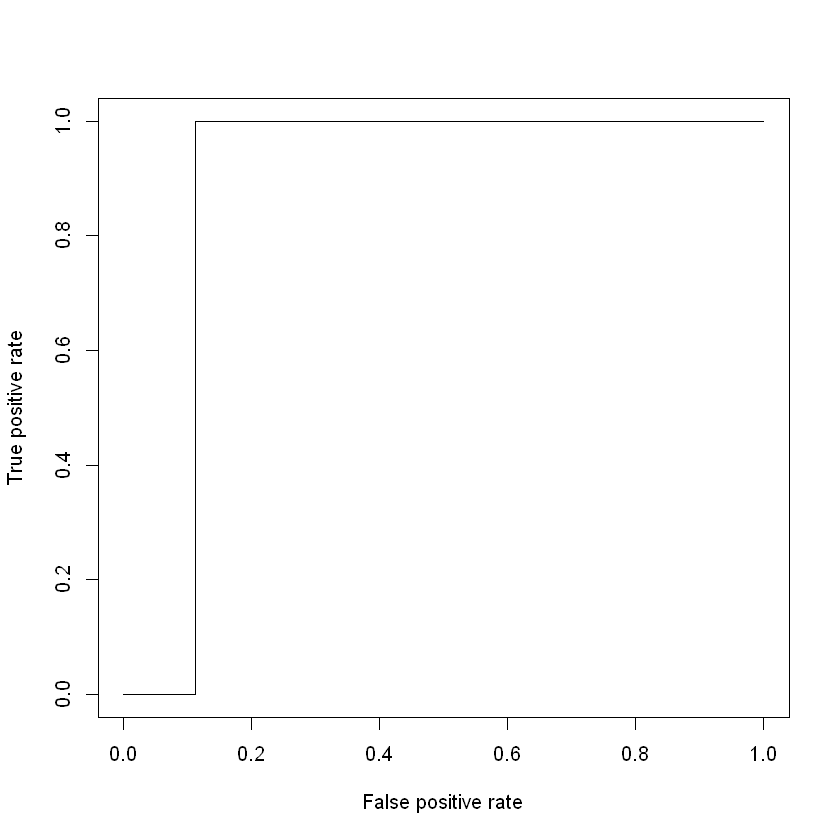

In [12]:
p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

In [13]:
auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

[1] 0.8888889


Call:
glm(formula = comp2 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3086  -0.9589  -0.7036   1.1269   2.1227  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -0.7966     1.4929  -0.534    0.594
definitionharmony  -0.7880     0.9077  -0.868    0.385
needharmony         0.9713     0.8456   1.149    0.251
purposecosmetic     1.3344     0.9155   1.458    0.145
purposeetc          0.8154     0.9140   0.892    0.372
interest           -0.1393     0.3628  -0.384    0.701

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54.748  on 41  degrees of freedom
Residual deviance: 50.965  on 36  degrees of freedom
AIC: 62.965

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,54.74755,NA
definition,1,0.06153656,40,54.68601,0.8040836
need,1,1.15241108,39,53.53360,0.2830450
purpose,2,2.42136323,37,51.11224,0.2979941
interest,1,0.14749261,36,50.96475,0.7009431


[1] 0.5083333

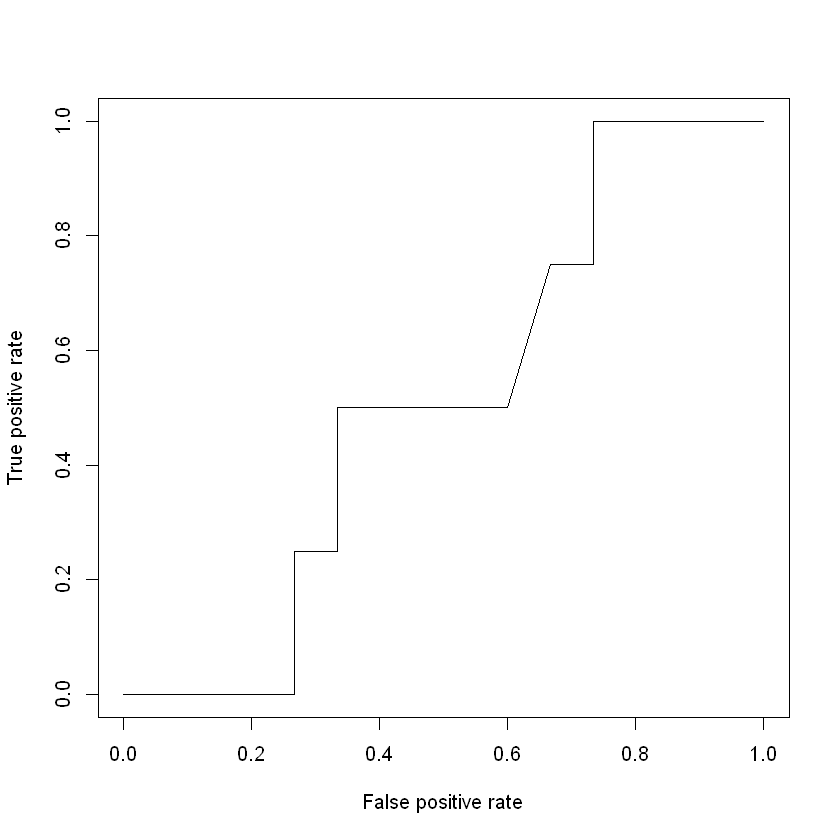

In [14]:
model <- glm(comp2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp3 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3923  -0.5904  -0.3863  -0.2349   2.2971  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -3.6165     2.3098  -1.566   0.1174  
definitionharmony   1.9800     1.3282   1.491   0.1360  
needharmony        -0.5846     0.9941  -0.588   0.5565  
purposecosmetic    -1.6086     1.2692  -1.267   0.2050  
purposeetc         -1.9395     1.1380  -1.704   0.0883 .
interest            0.5322     0.5257   1.012   0.3113  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 37.847  on 41  degrees of freedom
Residual deviance: 31.738  on 36  degrees of freedom
AIC: 43.738

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,37.84714,NA
definition,1,1.2269073,40,36.62023,0.2680093
need,1,0.5341897,39,36.08604,0.4648507
purpose,2,3.2282716,37,32.85777,0.1990626
interest,1,1.1199569,36,31.73782,0.2899277


[1] 0.4388889

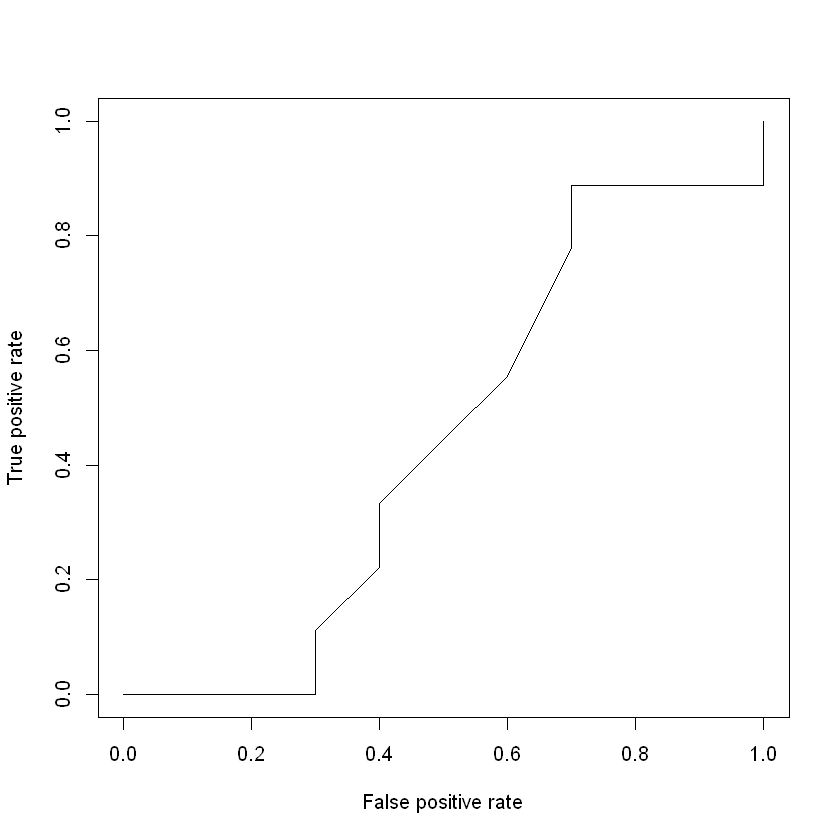

In [15]:
model <- glm(comp3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp4 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1417  -0.6226  -0.4305  -0.2851   2.2156  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -2.93107    2.11366  -1.387    0.166
definitionharmony  1.18687    1.29439   0.917    0.359
needharmony       -0.43156    0.94511  -0.457    0.648
purposecosmetic    0.06506    1.49520   0.044    0.965
purposeetc         1.78552    1.21372   1.471    0.141
interest          -0.06295    0.44543  -0.141    0.888

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 40.901  on 41  degrees of freedom
Residual deviance: 35.000  on 36  degrees of freedom
AIC: 47

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,40.90067,NA
definition,1,1.79519579,40,39.10547,0.1802944
need,1,0.13422456,39,38.97125,0.7140915
purpose,2,3.95131267,37,35.01993,0.1386703
interest,1,0.01996244,36,34.99997,0.8876420


[1] 0.1323529

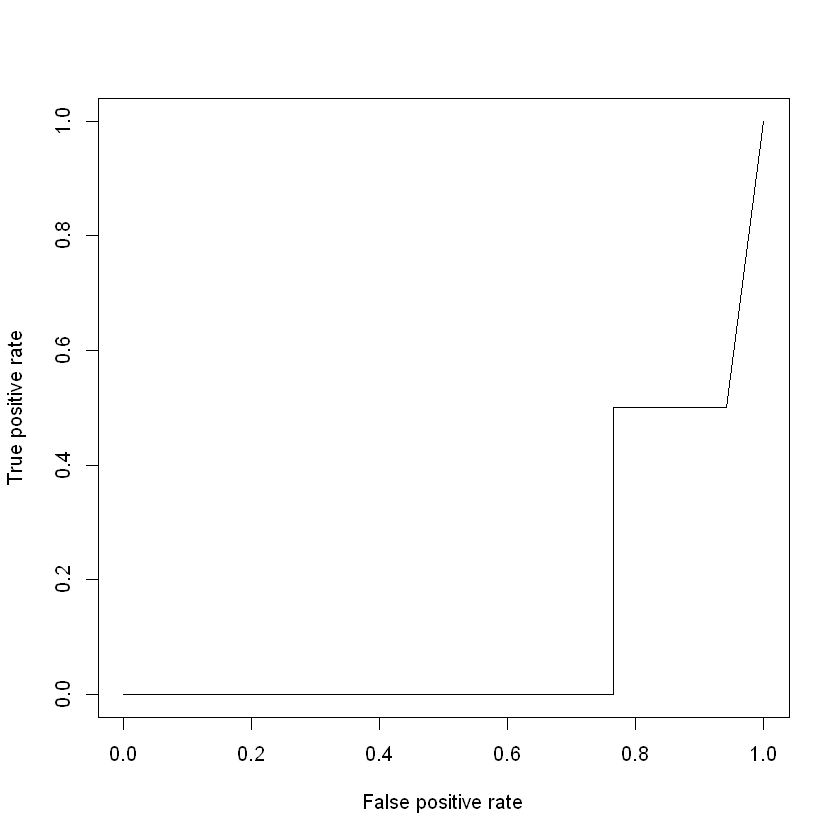

In [16]:
model <- glm(comp4 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp5 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8216  -0.5504  -0.4113  -0.3061   2.3053  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -2.12690    2.20644  -0.964    0.335
definitionharmony  0.60667    1.36765   0.444    0.657
needharmony        0.54168    1.15889   0.467    0.640
purposecosmetic    0.15724    1.12932   0.139    0.889
purposeetc        -1.17455    1.36034  -0.863    0.388
interest          -0.09149    0.53559  -0.171    0.864

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 30.662  on 41  degrees of freedom
Residual deviance: 28.583  on 36  degrees of freedom
AIC: 40.583

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,30.66194,NA
definition,1,0.34200757,40,30.31994,0.5586727
need,1,0.22635421,39,30.09358,0.6342404
purpose,2,1.48183180,37,28.61175,0.4766771
interest,1,0.02911107,36,28.58264,0.8645228


[1] 0.6354167

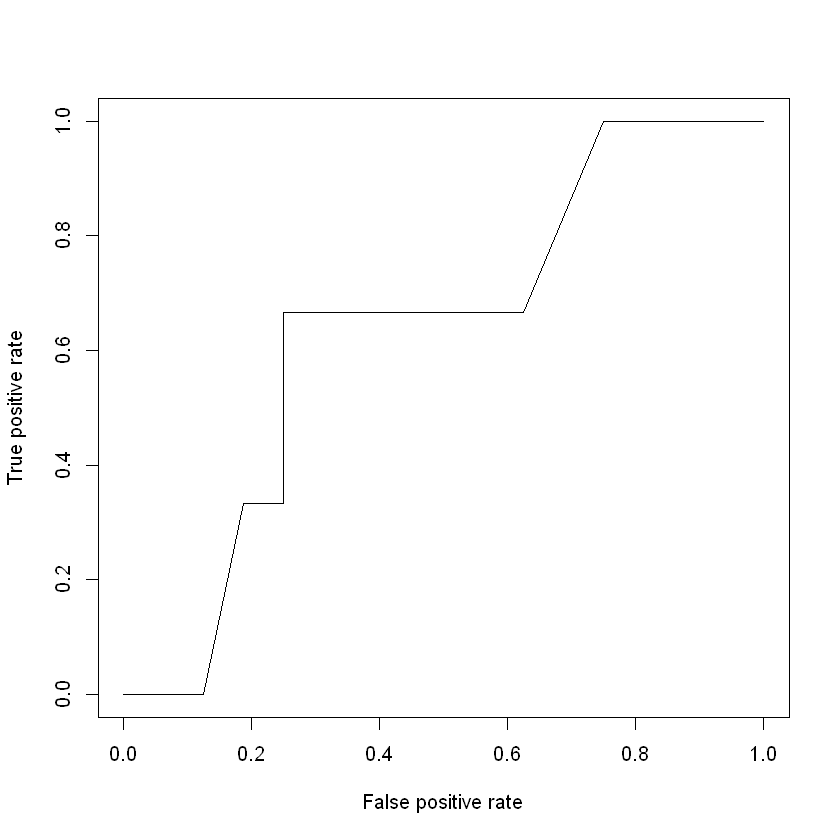

In [17]:
model <- glm(comp5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = t1_1 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.14825  -0.22267  -0.00004   0.00000   1.88499  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)        -42.7557  7972.6187  -0.005    0.996
definitionharmony   16.8548  6142.6138   0.003    0.998
needharmony         19.7430  5082.4141   0.004    0.997
purposecosmetic      0.8641     1.7801   0.485    0.627
purposeetc          -2.0936     2.1543  -0.972    0.331
interest             1.5222     1.1934   1.276    0.202

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 21.615  on 41  degrees of freedom
Residual deviance: 13.117  on 36  degrees of freedom
AIC: 25.117

Number of Fisher Scoring iterations: 20


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,21.61477,NA
definition,1,2.3243013,40,19.29046,0.12736740
need,1,3.0702610,39,16.22020,0.07973667
purpose,2,0.4385204,37,15.78168,0.80311272
interest,1,2.6648133,36,13.11687,0.10258986


[1] 0.3958333

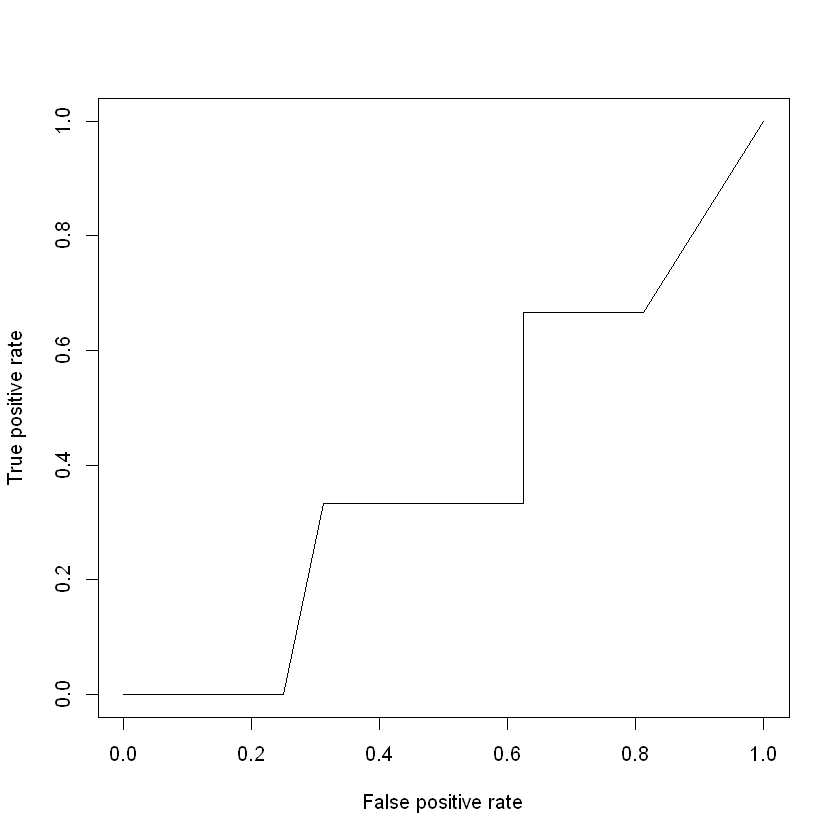

In [18]:
model <- glm(t1_1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_2 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.68518  -0.58807  -0.39275  -0.00008   2.21151  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)
(Intercept)         -3.00397    2.49581  -1.204    0.229
definitionharmony   -0.08237    1.47777  -0.056    0.956
needharmony          0.05636    1.25852   0.045    0.964
purposecosmetic    -17.03485 3097.57225  -0.005    0.996
purposeetc           0.85625    1.31948   0.649    0.516
interest             0.16882    0.58604   0.288    0.773

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 26.417  on 41  degrees of freedom
Residual deviance: 22.798  on 36  degrees of freedom
AIC: 34.798

Number of Fisher Scoring iterations: 18


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,26.41734,NA
definition,1,0.075956778,40,26.34139,0.7828533
need,1,0.005343854,39,26.33604,0.9417252
purpose,2,3.453747283,37,22.88230,0.1778395
interest,1,0.084156152,36,22.79814,0.7717422


[1] 0.2222222

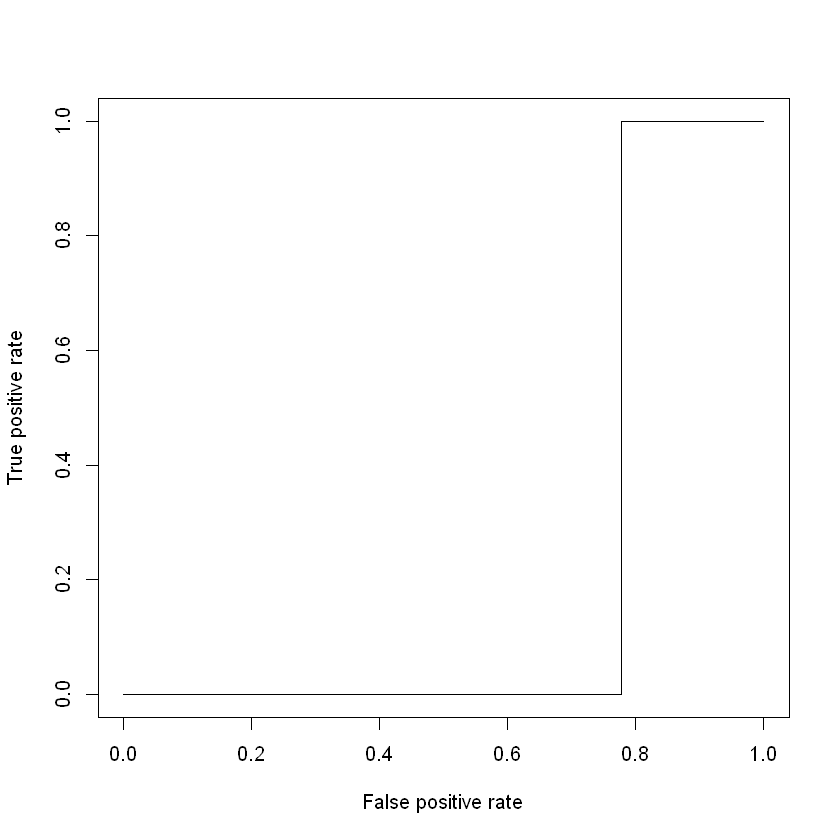

In [19]:
model <- glm(t1_2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_3 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1764  -0.9572  -0.8217   1.1784   1.7576  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -0.1456     1.4385  -0.101    0.919
definitionharmony  -0.1206     0.8665  -0.139    0.889
needharmony         0.4071     0.7800   0.522    0.602
purposecosmetic     0.1106     0.8798   0.126    0.900
purposeetc          0.6185     0.8445   0.732    0.464
interest           -0.2539     0.3543  -0.717    0.474

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54.748  on 41  degrees of freedom
Residual deviance: 53.299  on 36  degrees of freedom
AIC: 65.299

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,54.74755,NA
definition,1,0.2031863,40,54.54436,0.6521612
need,1,0.4170005,39,54.12736,0.5184376
purpose,2,0.3080736,37,53.81929,0.8572405
interest,1,0.5200591,36,53.29923,0.4708165


[1] 0.625

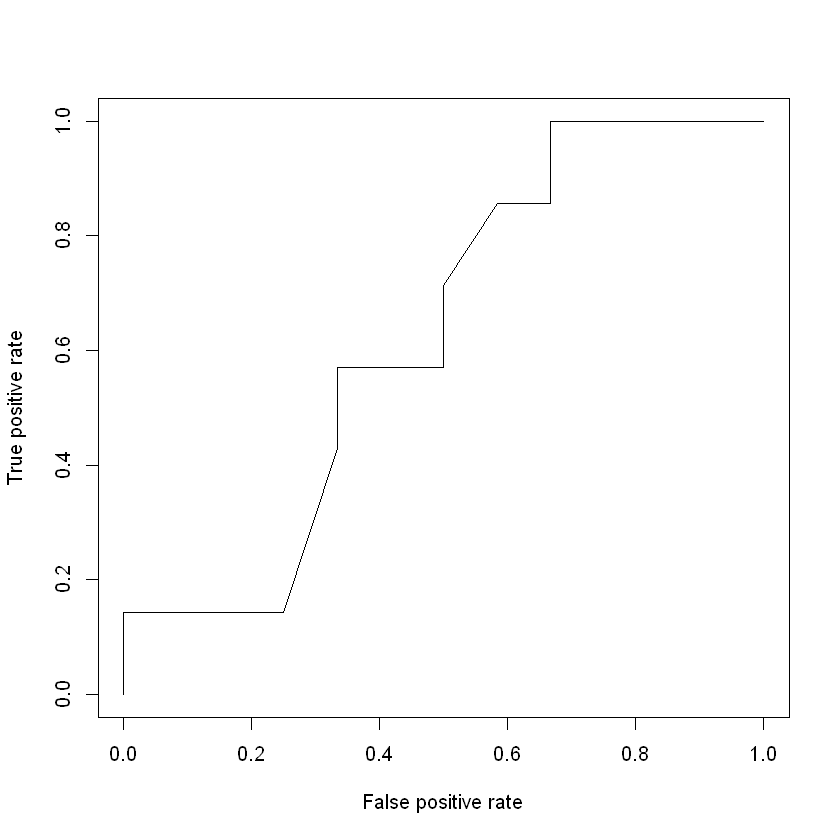

In [20]:
model <- glm(t1_3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_4 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9893  -0.6360  -0.5433  -0.4148   2.2428  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        0.87876    1.72902   0.508    0.611
definitionharmony -1.31722    1.04945  -1.255    0.209
needharmony       -0.02098    1.03343  -0.020    0.984
purposecosmetic   -0.58474    1.07973  -0.542    0.588
purposeetc         0.22491    1.02424   0.220    0.826
interest          -0.43926    0.44638  -0.984    0.325

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 40.901  on 41  degrees of freedom
Residual deviance: 38.082  on 36  degrees of freedom
AIC: 50.082

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,40.90067,NA
definition,1,1.58336958,40,39.31730,0.2082760
need,1,0.04382266,39,39.27348,0.8341839
purpose,2,0.19437740,37,39.07910,0.9073848
interest,1,0.99719736,36,38.08190,0.3179896


[1] 0.5104167

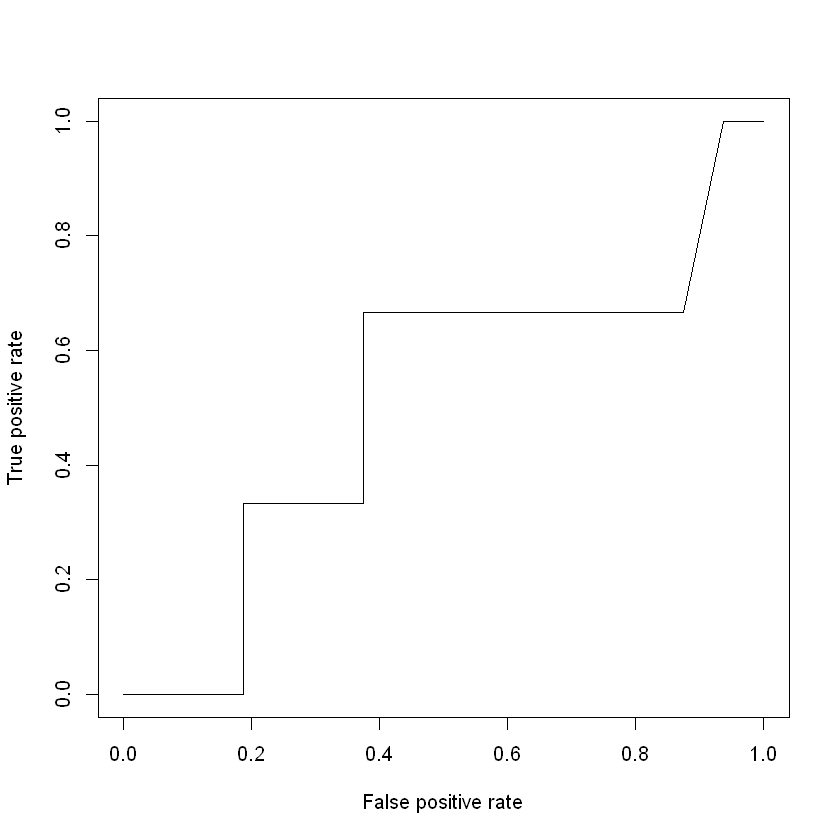

In [21]:
model <- glm(t1_4 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_5 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4044  -0.8047  -0.5311   1.0012   2.2320  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -1.6349     1.6538  -0.989    0.323
definitionharmony   0.9227     0.9016   1.023    0.306
needharmony        -1.4319     0.8937  -1.602    0.109
purposecosmetic     0.4578     0.8968   0.510    0.610
purposeetc         -1.0342     0.9773  -1.058    0.290
interest            0.2579     0.4017   0.642    0.521

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 50.255  on 41  degrees of freedom
Residual deviance: 44.500  on 36  degrees of freedom
AIC: 56.5

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,50.25465,NA
definition,1,0.04420834,40,50.21044,0.83346647
need,1,3.34092563,39,46.86951,0.06757658
purpose,2,1.94658905,37,44.92292,0.37783619
interest,1,0.42293882,36,44.49998,0.51547426


[1] 0.3642857

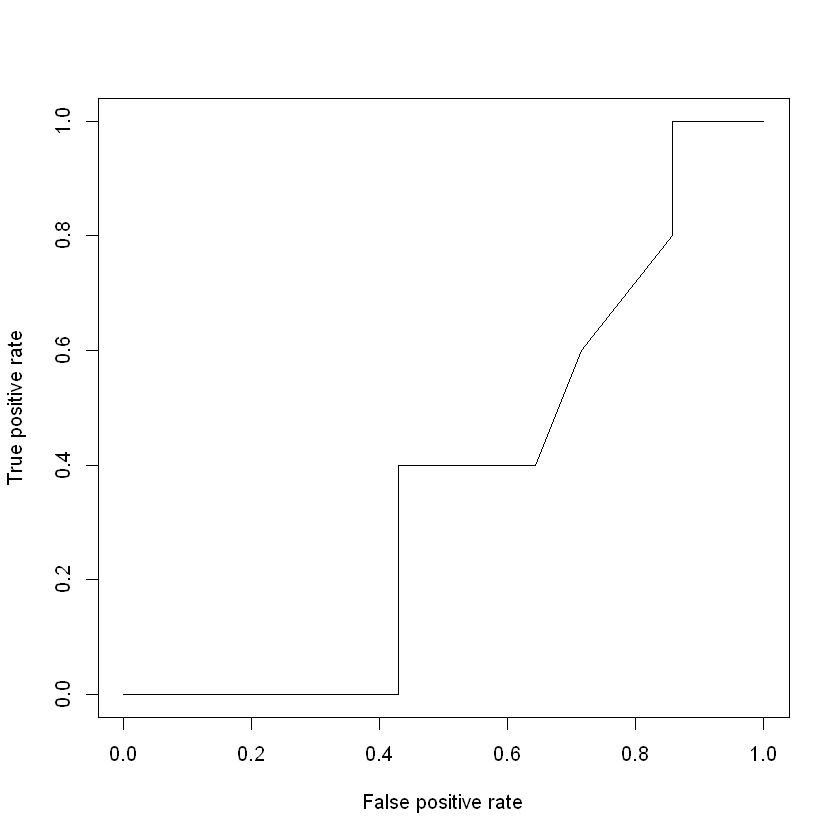

In [22]:
model <- glm(t1_5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = t2_1 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.30731  -0.00011  -0.00003   0.00000   2.24837  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -44.9319  9425.8426  -0.005   0.9962  
definitionharmony   19.8392  6327.6838   0.003   0.9975  
needharmony         -0.6234     1.4502  -0.430   0.6673  
purposecosmetic      0.3107  9977.0064   0.000   1.0000  
purposeetc          19.1548  6986.1951   0.003   0.9978  
interest             1.3723     0.8248   1.664   0.0961 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 26.417  on 41  degrees of freedom
Residual deviance: 12.299  on 36  degrees of freedom
AIC: 24.299

Number of Fisher Scoring iterations: 20


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,26.41734,NA
definition,1,3.1483328,40,23.26901,0.07600458
need,1,0.2799917,39,22.98902,0.59670668
purpose,2,6.7241921,37,16.26483,0.03466253
interest,1,3.9662266,36,12.29860,0.04642169


[1] 0.3088235

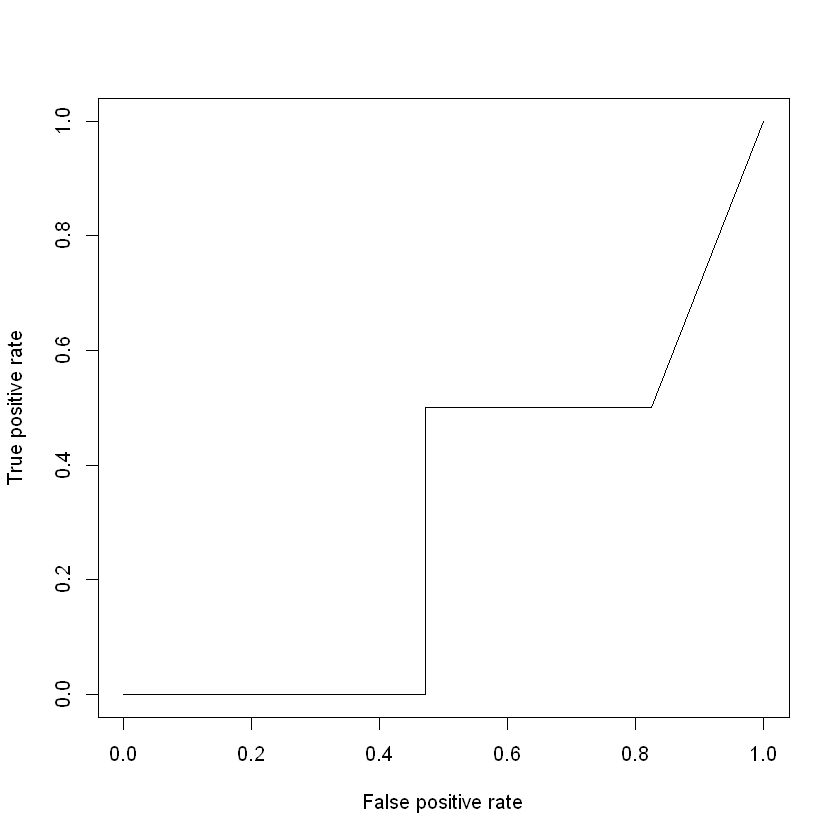

In [23]:
model <- glm(t2_1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = t2_2 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.96289  -0.00003   0.00000   0.00000   1.64595  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)
(Intercept)         -37.0558 12251.4177  -0.003    0.998
definitionharmony    18.8066  9579.1227   0.002    0.998
needharmony          19.3053  7637.9096   0.003    0.998
purposecosmetic     -20.9424 11497.3021  -0.002    0.999
purposeetc          -20.9923 10384.2747  -0.002    0.998
interest             -0.5280     0.9724  -0.543    0.587

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 16.0813  on 41  degrees of freedom
Residual deviance:  6.4178  on 36  degrees of freedom
AIC: 18.418

Number of Fisher Scoring iterations: 21


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,16.081303,NA
definition,1,1.5259241,40,14.555379,0.21672519
need,1,1.9974232,39,12.557955,0.15756687
purpose,2,5.8278388,37,6.730117,0.05426264
interest,1,0.3123215,36,6.417795,0.57625912


[1] 0.3382353

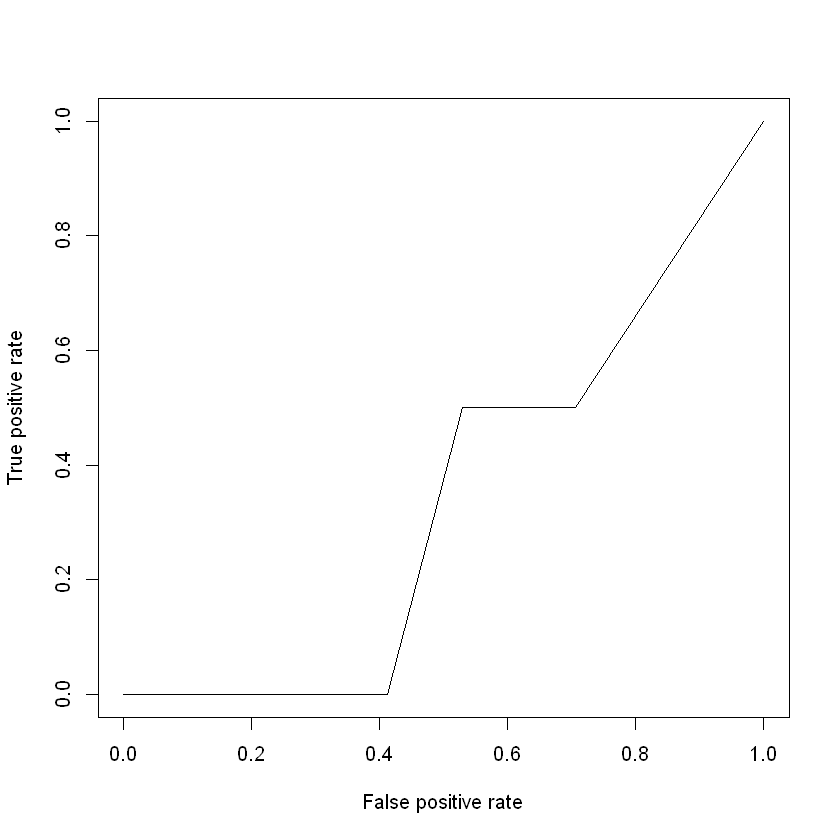

In [24]:
model <- glm(t2_2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_3 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1750  -0.8522  -0.7228   1.2874   1.7845  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.23271    1.48618  -0.157    0.876
definitionharmony -0.29971    0.85173  -0.352    0.725
needharmony       -0.21510    0.81876  -0.263    0.793
purposecosmetic    0.41877    0.85416   0.490    0.624
purposeetc        -0.23348    0.88444  -0.264    0.792
interest          -0.09592    0.36672  -0.262    0.794

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 51.972  on 41  degrees of freedom
Residual deviance: 50.537  on 36  degrees of freedom
AIC: 62.537

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,51.97241,NA
definition,1,0.48701591,40,51.48539,0.4852615
need,1,0.07716680,39,51.40822,0.7811742
purpose,2,0.80275735,37,50.60547,0.6693965
interest,1,0.06834546,36,50.53712,0.7937612


[1] 0.45

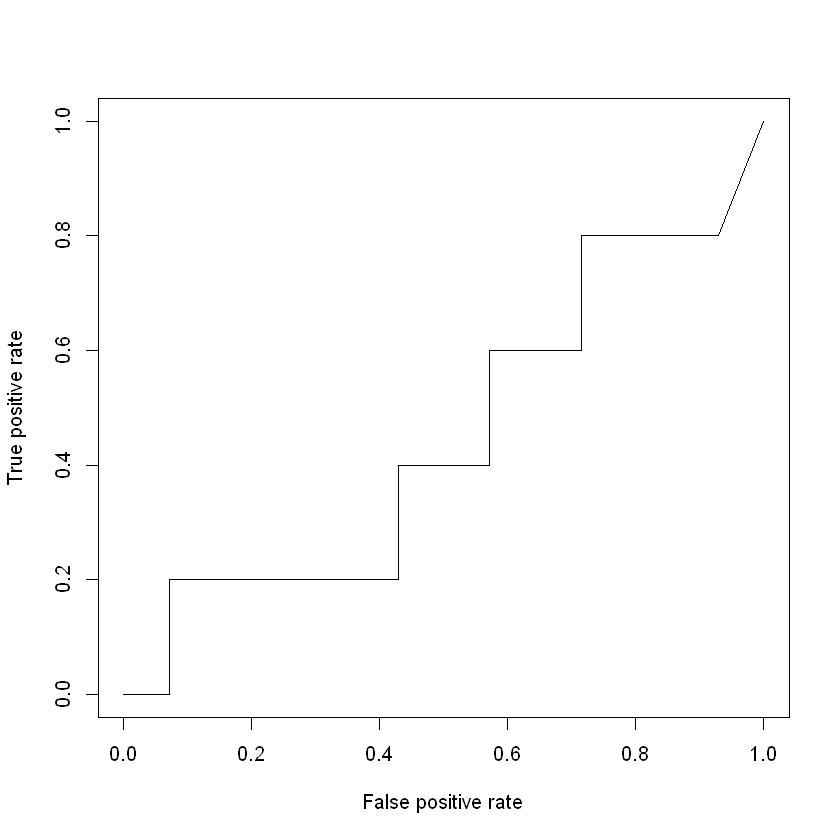

In [25]:
model <- glm(t2_3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_4 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1300  -0.9574  -0.8380   1.3055   1.6714  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.62537    1.43829  -0.435    0.664
definitionharmony  0.13315    0.82354   0.162    0.872
needharmony       -0.29684    0.77293  -0.384    0.701
purposecosmetic    0.11665    0.83053   0.140    0.888
purposeetc        -0.45507    0.83405  -0.546    0.585
interest           0.06576    0.35141   0.187    0.852

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54.748  on 41  degrees of freedom
Residual deviance: 53.997  on 36  degrees of freedom
AIC: 65.997

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,54.74755,NA
definition,1,0.06153656,40,54.68601,0.8040836
need,1,0.19812728,39,54.48789,0.6562367
purpose,2,0.45534482,37,54.03254,0.7963851
interest,1,0.03509954,36,53.99744,0.8513872


[1] 0.5285714

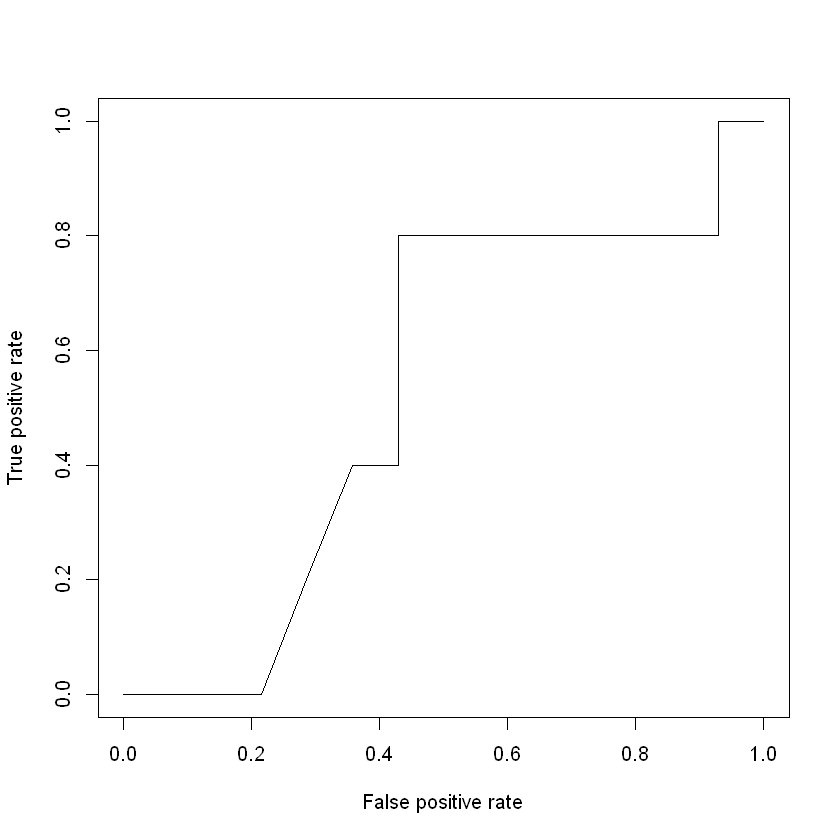

In [26]:
model <- glm(t2_4 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_5 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9953  -0.7007  -0.5309  -0.4138   2.0255  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.03751    1.71504  -0.022    0.983
definitionharmony -1.08447    1.11313  -0.974    0.330
needharmony        0.50114    1.02774   0.488    0.626
purposecosmetic    0.05122    1.13351   0.045    0.964
purposeetc         1.03815    1.08162   0.960    0.337
interest          -0.43100    0.43958  -0.980    0.327

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 40.901  on 41  degrees of freedom
Residual deviance: 38.741  on 36  degrees of freedom
AIC: 50.741

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,40.90067,NA
definition,1,0.1931647,40,40.70750,0.6602956
need,1,0.3978587,39,40.30964,0.5281972
purpose,2,0.5814166,37,39.72823,0.7477337
interest,1,0.9876644,36,38.74056,0.3203139


[1] 0.3285714

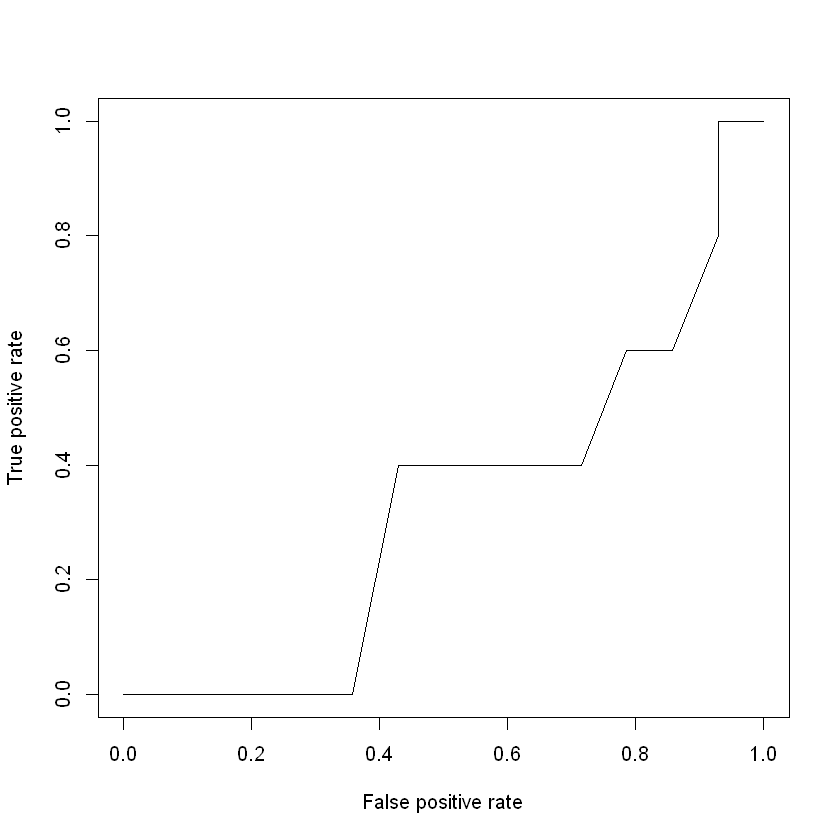

In [27]:
model <- glm(t2_5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_1 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9511  -0.4510  -0.3417  -0.1821   2.2561  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -3.0505     2.3892  -1.277    0.202
definitionharmony  -0.3469     1.5845  -0.219    0.827
needharmony         2.2514     1.5464   1.456    0.145
purposecosmetic     0.4441     1.2068   0.368    0.713
purposeetc         -1.2316     1.4252  -0.864    0.388
interest            0.0477     0.5613   0.085    0.932

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 30.662  on 41  degrees of freedom
Residual deviance: 25.953  on 36  degrees of freedom
AIC: 37.953

Number of Fisher Scoring iterations: 6


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,30.66194,NA
definition,1,0.342007570,40,30.31994,0.55867270
need,1,2.712081759,39,27.60785,0.09959095
purpose,2,1.647575992,37,25.96028,0.43876646
interest,1,0.007233149,36,25.95304,0.93222329


[1] 0.2941176

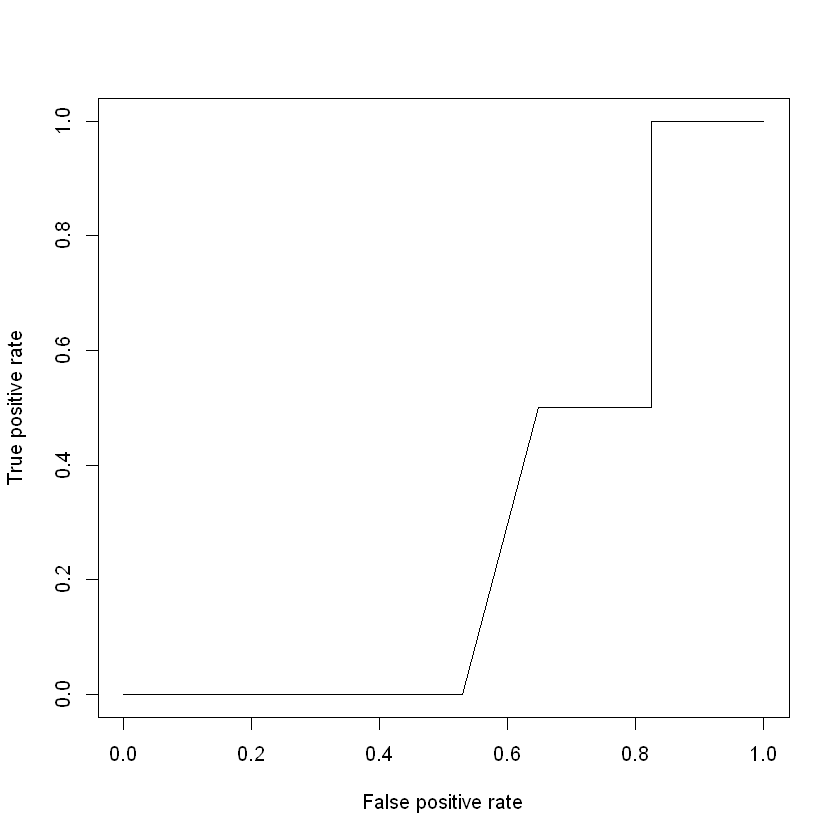

In [28]:
model <- glm(d1_1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_2 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3965  -0.8972  -0.5535   1.0615   1.9756  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)         0.7442     1.4996   0.496    0.620
definitionharmony   0.1404     0.8288   0.169    0.865
needharmony        -1.3435     0.8311  -1.616    0.106
purposecosmetic    -0.3968     0.8572  -0.463    0.643
purposeetc         -0.9758     0.8795  -1.109    0.267
interest           -0.1212     0.3677  -0.330    0.742

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54.748  on 41  degrees of freedom
Residual deviance: 49.623  on 36  degrees of freedom
AIC: 61.623

Number of Fisher Scoring iterations: 3


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,54.74755,NA
definition,1,0.8788988,40,53.86865,0.3485035
need,1,2.4721474,39,51.39650,0.1158795
purpose,2,1.6649271,37,49.73158,0.4349764
interest,1,0.1087184,36,49.62286,0.7416080


[1] 0.625

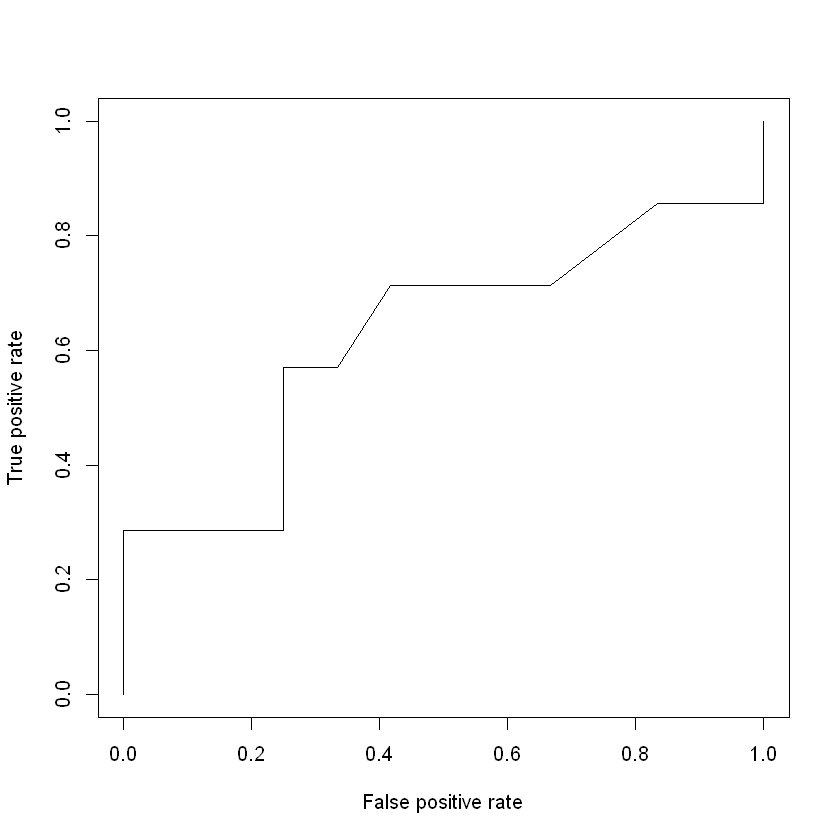

In [29]:
model <- glm(d1_2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

In [30]:
model <- glm(d1_3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_3 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.97261  -0.58729  -0.00005  -0.00004   1.81581  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)
(Intercept)        -21.28708 4865.94780  -0.004    0.997
definitionharmony   -0.56950    1.67877  -0.339    0.734
needharmony          0.21720    1.40222   0.155    0.877
purposecosmetic      0.07725 7022.50240   0.000    1.000
purposeetc          19.33473 4865.94726   0.004    0.997
interest             0.28989    0.62988   0.460    0.645

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 26.417  on 41  degrees of freedom
Residual deviance: 18.141  on 36  degrees of freedom
AIC: 30.141

Number of Fisher Scoring iterations: 19


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,26.41734,NA
definition,1,0.075956778,40,26.34139,0.78285333
need,1,0.005343854,39,26.33604,0.94172521
purpose,2,7.978223388,37,18.35782,0.01851615
interest,1,0.217095545,36,18.14073,0.64126193


ERROR: Error in prediction(p, test$d1_3): Number of classes is not equal to 2.
ROCR currently supports only evaluation of binary classification tasks.



Call:
glm(formula = d1_5 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0621  -0.8437  -0.4840  -0.2766   2.1489  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -3.7157     1.9649  -1.891   0.0586 .
definitionharmony   1.5877     1.2438   1.276   0.2018  
needharmony         0.3392     0.8525   0.398   0.6907  
purposecosmetic     0.7863     1.0717   0.734   0.4632  
purposeetc          0.4679     1.0040   0.466   0.6412  
interest            0.2087     0.4099   0.509   0.6107  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 46.105  on 41  degrees of freedom
Residual deviance: 42.065  on 36  degrees of freedom
AIC: 54.065

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,46.10545,NA
definition,1,3.13069979,40,42.97475,0.07683075
need,1,0.07468823,39,42.90006,0.78462917
purpose,2,0.57134218,37,42.32872,0.75150975
interest,1,0.26323488,36,42.06548,0.60790641


[1] 0.7386364

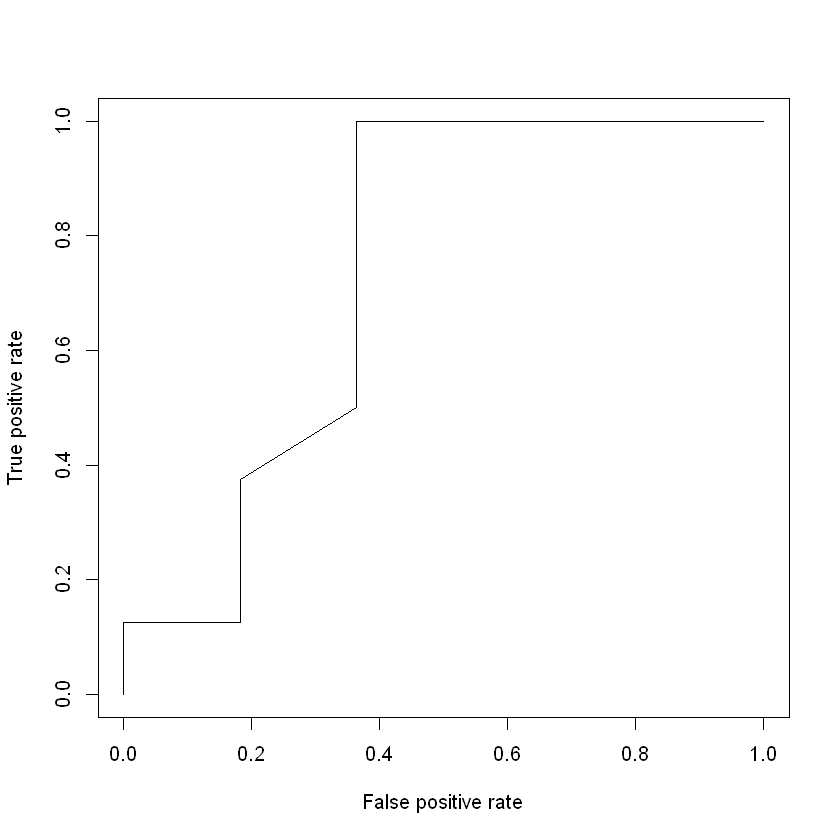

In [31]:
model <- glm(d1_5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_1 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.40149  -0.35230  -0.09295  -0.00003   1.87204  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)         -9.1887     5.2904  -1.737   0.0824 .
definitionharmony    0.9996     1.8710   0.534   0.5931  
needharmony         -0.2307     1.5733  -0.147   0.8834  
purposecosmetic    -18.7897  4389.0508  -0.004   0.9966  
purposeetc          -2.8436     1.9506  -1.458   0.1449  
interest             1.9403     1.2052   1.610   0.1074  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 21.615  on 41  degrees of freedom
Residual deviance: 14.172  on 36  degrees of freedom
AIC: 26.172

Number of Fisher Scoring iterations: 19


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,21.61477,NA
definition,1,0.008463454,40,21.60630,0.92670040
need,1,0.199236748,39,21.40707,0.65533763
purpose,2,2.988409990,37,18.41866,0.22442695
interest,1,4.246934095,36,14.17172,0.03932126


[1] 0.04411765

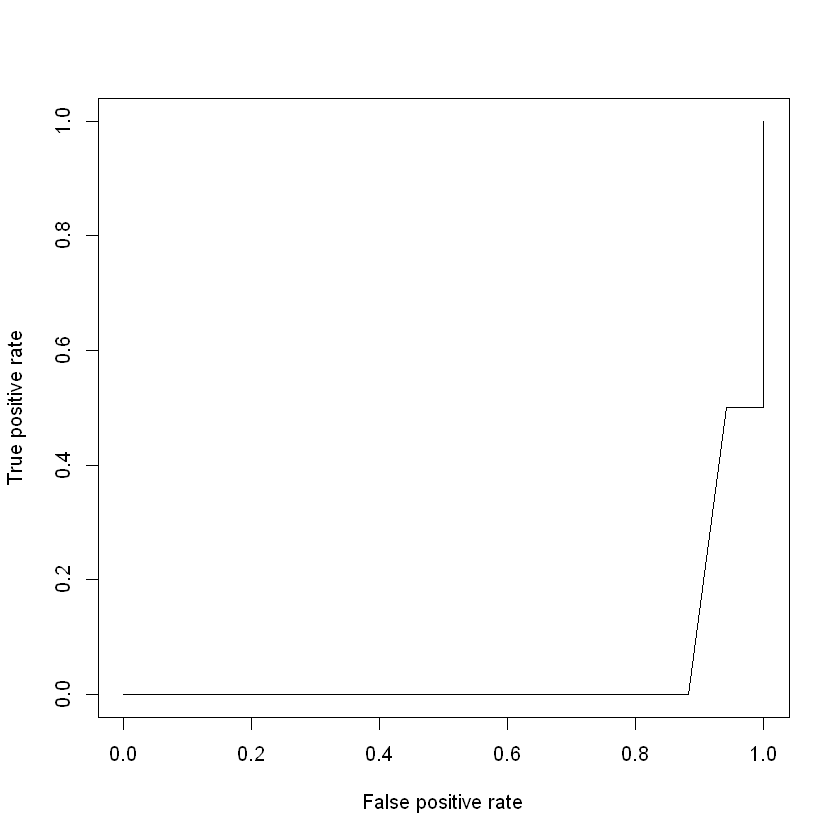

In [32]:
model <- glm(d2_1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_2 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3069  -0.8837  -0.7295   1.1970   2.1154  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -1.9802     1.5472  -1.280    0.201
definitionharmony  -0.1476     0.8984  -0.164    0.869
needharmony         1.0464     0.8344   1.254    0.210
purposecosmetic    -0.0183     0.8709  -0.021    0.983
purposeetc         -0.6871     0.8671  -0.792    0.428
interest            0.3452     0.3727   0.926    0.354

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 53.467  on 41  degrees of freedom
Residual deviance: 50.927  on 36  degrees of freedom
AIC: 62.927

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,53.46719,NA
definition,1,0.05612905,40,53.41106,0.8127222
need,1,1.29539755,39,52.11566,0.2550556
purpose,2,0.30415949,37,51.81150,0.8589198
interest,1,0.88433863,36,50.92717,0.3470161


[1] 0.4928571

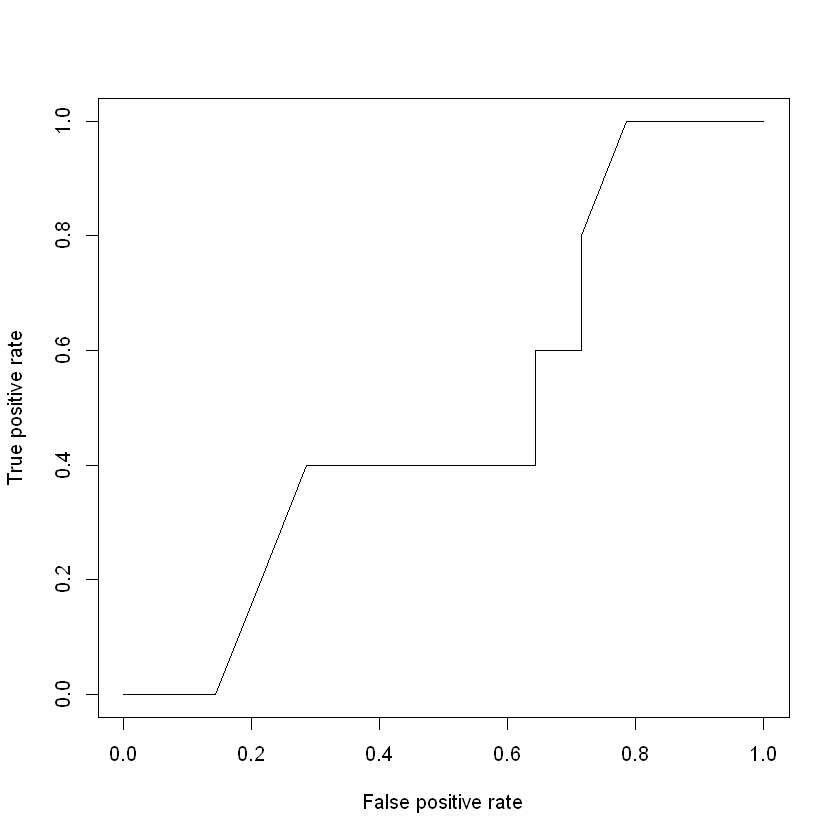

In [33]:
model <- glm(d2_2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_3 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1229  -0.7604  -0.5209  -0.3467   2.0320  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -2.71900    1.99560  -1.362    0.173
definitionharmony  0.84007    1.08605   0.774    0.439
needharmony       -0.64569    0.96237  -0.671    0.502
purposecosmetic    1.78278    1.22900   1.451    0.147
purposeetc         0.85677    1.26890   0.675    0.500
interest          -0.01666    0.43849  -0.038    0.970

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 40.901  on 41  degrees of freedom
Residual deviance: 37.429  on 36  degrees of freedom
AIC: 49.429

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,40.90067,NA
definition,1,0.168958449,40,40.73171,0.6810391
need,1,0.616495383,39,40.11521,0.4323526
purpose,2,2.684936192,37,37.43028,0.2612002
interest,1,0.001443193,36,37.42883,0.9696962


[1] 0.8235294

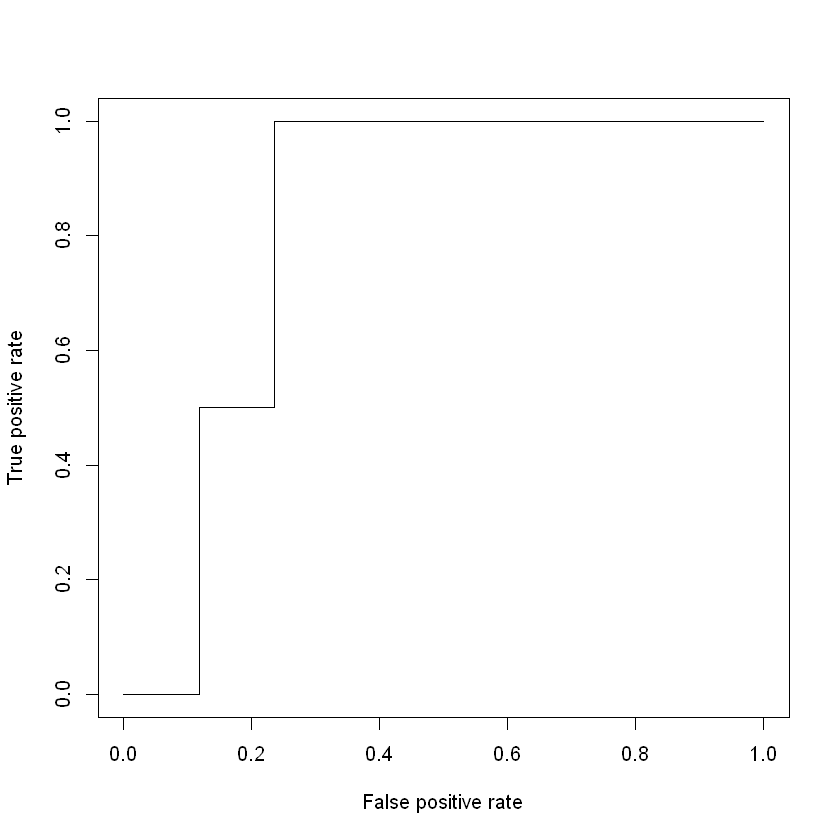

In [34]:
model <- glm(d2_3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_4 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5909  -0.9016  -0.6928   1.2080   1.8147  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)         1.5434     1.5082   1.023    0.306
definitionharmony   0.1296     0.8667   0.150    0.881
needharmony        -0.3893     0.7956  -0.489    0.625
purposecosmetic    -0.8664     0.9249  -0.937    0.349
purposeetc          0.4943     0.8397   0.589    0.556
interest           -0.6166     0.3812  -1.617    0.106

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54.748  on 41  degrees of freedom
Residual deviance: 50.884  on 36  degrees of freedom
AIC: 62.884

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,54.74755,NA
definition,1,0.20318627,40,54.54436,0.65216118
need,1,0.01014049,39,54.53422,0.91978862
purpose,2,0.80038559,37,53.73384,0.67019083
interest,1,2.84934410,36,50.88449,0.09141122


[1] 0.5961538

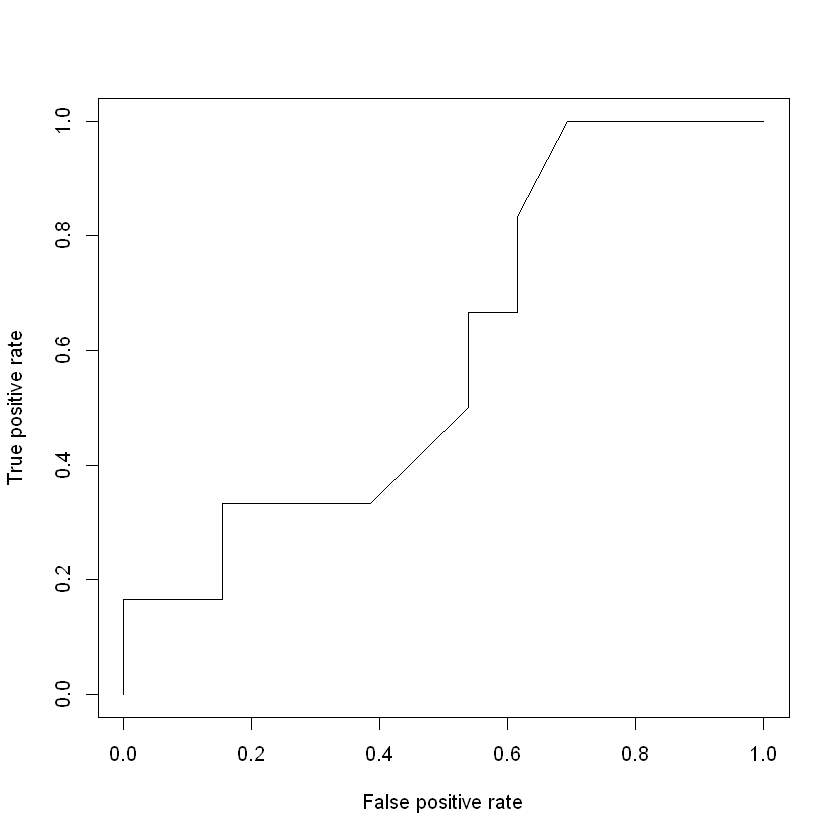

In [35]:
model <- glm(d2_4 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = d2_5 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.98476  -0.00005  -0.00003  -0.00002   1.79189  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)        -17.9360  6846.2328  -0.003    0.998
definitionharmony  -20.6347  6966.1159  -0.003    0.998
needharmony         -0.3965  8781.7025   0.000    1.000
purposecosmetic     18.7385  6846.2319   0.003    0.998
purposeetc          20.3761  6846.2322   0.003    0.998
interest            -0.7280     1.3553  -0.537    0.591

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 16.0813  on 41  degrees of freedom
Residual deviance:  8.4687  on 36  degrees of freedom
AIC: 20.469

Number of Fisher Scoring iterations: 20


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,41,16.081303,NA
definition,1,4.9189043,40,11.162399,0.02656436
need,1,0.3489295,39,10.813469,0.55471972
purpose,2,1.9903598,37,8.823109,0.36965694
interest,1,0.3544030,36,8.468706,0.55163120


[1] 0.4416667

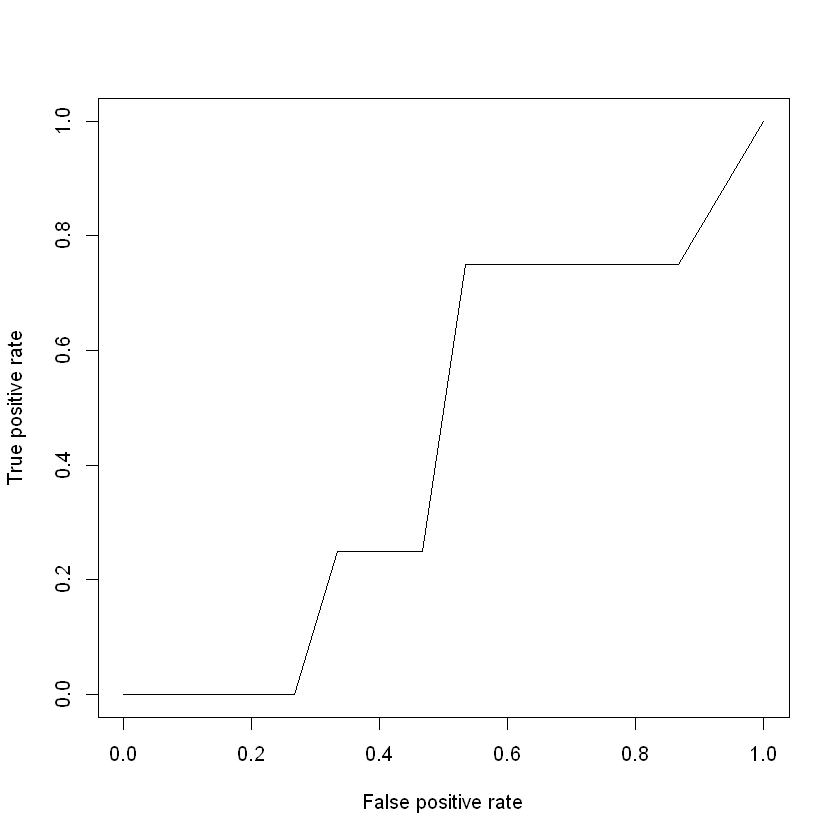

In [36]:
model <- glm(d2_5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

In [ ]:
model <- glm(d3_1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

In [ ]:
model <- glm(d3_2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

In [ ]:
model <- glm(d3_3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

In [ ]:
model <- glm(d3_4 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

In [ ]:
model <- glm(d3_5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc